In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号

In [96]:
d33=pd.read_csv('E:/yadian.csv')  #读取数据集
x=d33[[ '取向因子y','平面聚集度y','聚集高度y','平面聚集数y','取向因子x','平面聚集度x','聚集高度x','平面聚集数x','界面垂直因子','界面平行因子','优势路径','最短路径','PZT体积分数','通道因子y','通道因子z','通道因子x','优势分布','受力因子','聚集数','最大聚集度','平均聚集度','颗粒平均高度','竖向因子','取向因子','高度与面积之比y','高度与面积之比x','周长y','周长x','圆度y','圆度x','上下界面面积与体积之比','侧面界面面积与体积之比','颗粒平均表面积','颗粒平均比表面积','球度']]
y=d33['d33']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=201)

In [97]:
#GBRT
from sklearn.ensemble import GradientBoostingRegressor
#params = {'n_estimators': 3000, 'max_depth': 2, 'min_samples_split': 2, 'learning_rate': 0.005, 'loss': 'ls'}
GBRT =  GradientBoostingRegressor()
GBRT.fit(x_train, y_train)
GBRT_y_predict = GBRT.predict(x_test)

In [98]:
#RF
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)
RF_y_predict = RF.predict(x_test)

In [99]:
from sklearn.svm import SVR
SVR = make_pipeline(StandardScaler(), SVR(kernel="rbf",gamma=0.26826957952797276,C=100))
SVR.fit(x_train, y_train)
SVR_y_predict = SVR.predict(x_test)

In [100]:
#Bagging
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor()
bagging.fit(x_train, y_train)
bagging_y_predict = bagging.predict(x_test)

In [101]:
rfe=RFE(estimator=GBRT,n_features_to_select=8,step=1)
X_RFE=rfe.fit(x_train, y_train)
print(X_RFE.ranking_)
print(X_RFE.n_features_) 
print(X_RFE.support_)
X_wrapper1 = X_RFE.transform(x_train)                                   # 最优特征
score =cross_val_score(GBRT, X_wrapper1,y_train, cv=9).mean()
print(score)

[14 11  1 20  1 16  1 26 12  1 10 22  4 18  1 28 19  8 27  1  9  2 13 24
 23 25  5  3 15  6  7 17  1 21  1]
8
[False False  True False  True False  True False False  True False False
 False False  True False False False False  True False False False False
 False False False False False False False False  True False  True]
0.928376138154733


0.9282160558344703 8
[0.8678968769949396, 0.9158345879061949, 0.9193997113429295, 0.9218925748150193, 0.9267421891430002, 0.9252040219471309, 0.9230162769353887, 0.9282160558344703, 0.9262991005598448, 0.9215459933172795, 0.9205585690493822, 0.9211293713200288, 0.9226535329718683, 0.9234898348053724, 0.9261755923736938, 0.9266382335113574, 0.9243852992520505, 0.9265845259255437, 0.9234744255111883, 0.9240812662759724, 0.9209964329733562, 0.9212316487158532, 0.9207701247706304, 0.9191939413817167, 0.918734741870663, 0.9199692487017355, 0.9208154166707521, 0.9217225871164498, 0.9200797893958793, 0.9182313759697592, 0.9182238072644873, 0.9183797570195773, 0.9192461194327173, 0.917796139609513, 0.9181469749687302]


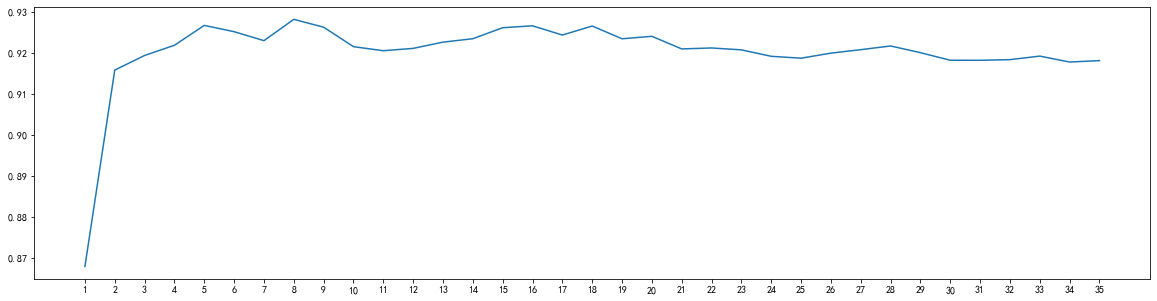

In [103]:
score = [] 
for i in range(1, 36, 1):
    X_wrapper = RFE(GBRT, n_features_to_select=i, step=1).fit_transform(x_train,y_train)
    once = cross_val_score(GBRT, X_wrapper,y_train, cv=5).mean()
    score.append(once)
print(max(score), (score.index(max(score))*1)+1)
print(score)
plt.figure(figsize=[20, 5])
plt.plot(range(1, 36, 1), score)
plt.xticks(range(1, 36, 1))
plt.show()
name=['score']
test520=pd.DataFrame(columns=name,data=score)
test520.to_csv('E:/xiaocu.csv',encoding='utf-8-sig')